# Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import statsmodels.api as sm
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
import random
random.seed(42)

# Reading in the Data

In [2]:
# Read in data using python pandas
df = pd.read_csv('dynamic_features.csv')
print(df.shape)
df.head()


(36434, 262)


,musicId,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,...,pcm_fftMag_mfcc_sma_de[5]_std,pcm_fftMag_mfcc_sma_de[6]_std,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std
0,1,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,...,3.360937,4.275177,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544
1,1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,...,4.089718,3.798621,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661
2,1,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,...,4.712993,3.006370,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483
3,1,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,...,3.900845,2.623482,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041
4,1,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,...,1.913931,2.096191,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982


# Overview Info of Data

In [3]:
# A little information about the data
df.info

<bound method DataFrame.info of        musicId  frameTime  F0final_sma_mean  voicingFinalUnclipped_sma_mean  \
0            1        1.0         76.236881                        0.638026   
1            1        1.5         71.114166                        0.651490   
2            1        2.0         72.168291                        0.638354   
3            1        2.5        106.613114                        0.665557   
4            1        3.0         87.619460                        0.678091   
...        ...        ...               ...                             ...   
36429      624        1.5        115.310220                        0.768102   
36430      624        2.0        102.391508                        0.777736   
36431      624        2.5         60.120377                        0.768029   
36432      624        3.0         90.506923                        0.740515   
36433      624        3.5        130.481778                        0.732177   

       jitterLocal_

# Duplicate Data

In [4]:
# Duplicating our data so as not to tamper with our original data in case something does goes wrong
dfe = df.copy()

In [5]:
# Drop null values from the data. that is cells with no data points
dfe = dfe.dropna()
dfe.isnull().sum()

musicId                           0
frameTime                         0
F0final_sma_mean                  0
voicingFinalUnclipped_sma_mean    0
jitterLocal_sma_mean              0
                                 ..
pcm_fftMag_mfcc_sma_de[10]_std    0
pcm_fftMag_mfcc_sma_de[11]_std    0
pcm_fftMag_mfcc_sma_de[12]_std    0
pcm_fftMag_mfcc_sma_de[13]_std    0
pcm_fftMag_mfcc_sma_de[14]_std    0
Length: 262, dtype: int64

# Statistical Summary of the data

In [6]:
dfe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
musicId,36434.0,315.349866,184.228383,1.000000,147.000000,323.000000,480.000000,624.000000
frameTime,36434.0,21.179777,14.480787,1.000000,9.500000,19.000000,30.000000,85.000000
F0final_sma_mean,36434.0,113.635477,77.542918,0.000000,61.560121,91.050730,148.285399,556.793016
voicingFinalUnclipped_sma_mean,36434.0,0.726280,0.080184,0.000000,0.712212,0.739575,0.764950,0.959275
jitterLocal_sma_mean,36434.0,0.056431,0.035780,0.000000,0.029477,0.051211,0.077389,0.266294
...,...,...,...,...,...,...,...,...
pcm_fftMag_mfcc_sma_de[10]_std,36434.0,2.402110,0.537913,0.541700,2.027242,2.329052,2.703392,6.295761
pcm_fftMag_mfcc_sma_de[11]_std,36434.0,2.342562,0.513804,0.564994,1.981677,2.276790,2.630647,6.006817
pcm_fftMag_mfcc_sma_de[12]_std,36434.0,2.226553,0.491726,0.485912,1.881653,2.161167,2.509854,5.028401
pcm_fftMag_mfcc_sma_de[13]_std,36434.0,2.080104,0.471612,0.501418,1.748834,2.020129,2.352093,5.021756


In [7]:
print(" Dimension of The Sample Size ")
print(" ")
print(dfe.shape)

print(" ")
print(" ===================== Statistical Summary of the data ========================= ")
print(" ")
#shows the statistical summary of the data
summary = dfe.describe()
print(summary)

 Dimension of The Sample Size 
 
(36434, 262)
 
 ===================== Statistical Summary of the data ========================= 
 
            musicId     frameTime  F0final_sma_mean  \
count  36434.000000  36434.000000      36434.000000   
mean     315.349866     21.179777        113.635477   
std      184.228383     14.480787         77.542918   
min        1.000000      1.000000          0.000000   
25%      147.000000      9.500000         61.560121   
50%      323.000000     19.000000         91.050730   
75%      480.000000     30.000000        148.285399   
max      624.000000     85.000000        556.793016   

       voicingFinalUnclipped_sma_mean  jitterLocal_sma_mean  \
count                    36434.000000          36434.000000   
mean                         0.726280              0.056431   
std                          0.080184              0.035780   
min                          0.000000              0.000000   
25%                          0.712212              0.0294

# Reading in Annotations

In [8]:
df_target = pd.read_csv('dynamic_annotations_std.csv')
df_target.dropna()
print(df_target.info)
df_target.head()

<bound method DataFrame.info of        musicId  frameTime  Arousal(std)  Valence(std)
0            1       15.5      0.287885      0.275739
1            1       16.0      0.288283      0.277381
2            1       16.5      0.285353      0.282204
3            1       17.0      0.285664      0.288056
4            1       17.5      0.286594      0.291165
...        ...        ...           ...           ...
36429     1000       75.0      0.241624      0.375881
36430     1000       75.5      0.225878      0.377234
36431     1000       76.0      0.225878      0.378260
36432     1000       76.5      0.219475      0.378260
36433     1000       77.0      0.244525      0.378514

[36434 rows x 4 columns]>


,musicId,frameTime,Arousal(std),Valence(std)
0,1,15.5,0.287885,0.275739
1,1,16.0,0.288283,0.277381
2,1,16.5,0.285353,0.282204
3,1,17.0,0.285664,0.288056
4,1,17.5,0.286594,0.291165


In [9]:
print(" Dimension of the Target Size ")
print(" ")
print(df_target.shape)

 Dimension of the Target Size 
 
(36434, 4)


# Preprocessing the Arrousal and Valence data points

In [10]:
# Preprocessing the Arrousal and Valence data points i.e Scalling the data points
x = df_target[['Arousal(std)', 'Valence(std)']].values  
print(x)

data_scaler = StandardScaler()
x = data_scaler.fit_transform(x)
print(x)

[[0.28788535 0.27573863]
 [0.28828271 0.27738066]
 [0.28535324 0.2822042 ]
 ...
 [0.22587779 0.37825965]
 [0.21947457 0.37825965]
 [0.24452463 0.37851429]]
[[-0.02392255 -0.44060854]
 [-0.01978593 -0.42279217]
 [-0.05028265 -0.37045574]
 ...
 [-0.66944066  0.67176659]
 [-0.73610024  0.67176659]
 [-0.47532128  0.67452949]]


# Creating Classes for Clustering 

In [11]:
 class clust():
    
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, data, test_size=0.3, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


    def Kmeans(self, output='add'):
        n_clusters = 4
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

# Clustering The Data into 4 Categories (Centroids)

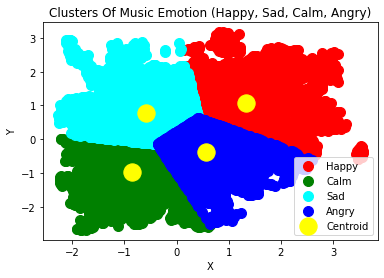

In [12]:

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(x)  
y_predict= kmeans.fit_predict(x)


#for first cluster  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'red', label = 'Happy')

#for second cluster 
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Calm')

# for third cluster
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'cyan', label = 'Sad')

#for 4th cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'blue', label = 'Angry')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')

plt.title('Clusters Of Music Emotion (Happy, Sad, Calm, Angry)')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.legend() 
plt.show()


# Checking Cluster Centers and Labels

In [13]:
kmeans.cluster_centers_

array([[ 1.32691453,  1.05768064],
       [-0.8512787 , -0.96750991],
       [-0.57673038,  0.78344302],
       [ 0.55974178, -0.36816414]])

In [14]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

# Converting into pandas data structure

In [15]:
# Converting into pandas data structure

df_target = pd.DataFrame(kmeans.labels_)
df_target.head()

,0
0,3
1,3
2,3
3,3
4,3


In [16]:
dfe = df.copy()

In [17]:
dfe.shape

(36434, 262)

In [18]:
dfe['target'] = df_target

In [19]:
dfe.shape

(36434, 263)

In [20]:
dfe.head()

,musicId,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,...,pcm_fftMag_mfcc_sma_de[6]_std,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target
0,1,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,...,4.275177,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3
1,1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,...,3.798621,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3
2,1,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,...,3.006370,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3
3,1,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,...,2.623482,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3
4,1,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,...,2.096191,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3


# Checking the number of targets counts

In [21]:
dfe['target'].value_counts()

1    10601
3    10193
2     9143
0     6497
Name: target, dtype: int64

# Adding Target names to the pandas dataframe

In [22]:
dfe['target_name'] = df_target
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Happy' if x == 1 else x)
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Sad' if x == 3 else x)
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Calm' if x == 2 else x)
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Angry' if x == 0 else x)

dfe.shape

(36434, 264)

In [23]:
dfe['target_name'].value_counts()

Happy    10601
Sad      10193
Calm      9143
Angry     6497
Name: target_name, dtype: int64

In [24]:
dfe = dfe.drop('musicId', axis = 1)
dfe.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


# Splitting data into Features and Targets

In [25]:
X = dfe.drop(['target','target_name'], axis = 1).values
y = dfe['target'].values

# Splitting the data into train set and test set 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
print(X_train.shape)
print(" ")
print(y_train.shape)

X_train_general = X_train
y_train_general = y_train

X_test_general = X_test
y_test_general = y_test

(29147, 261)
 
(29147,)


In [27]:
y_test_general.shape

(7287,)

# Preprocessing the Data (Scalling)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Outputing using the Random Forest Algorithm 

In [29]:
# USING RANDOM FOREST CLASSIFIER

model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.5852888705914643
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.72      0.31      0.44      1342
           1       0.55      0.75      0.63      2105
           2       0.62      0.56      0.59      1794
           3       0.57      0.62      0.60      2046

    accuracy                           0.59      7287
   macro avg       0.62      0.56      0.56      7287
weighted avg       0.60      0.59      0.57      7287

CONFUSION MATRIX
[[ 418  404  194  326]
 [  33 1572  195  305]
 [  45  428  999  322]
 [  82  458  230 1276]]
 
TIME EXHAUSTED
Training Time: 222.0806200504303 secs
Prediction Time: 1.3786520957946777 secs
Total Time: 223.45927214622498 secs


# Training and Outputing using the Support Vector Algorithm

In [30]:
# USING SUPPORT VECTOR MACHINE

model = SVC()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.3691505420612049
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.52      0.05      0.09      1342
           1       0.36      0.58      0.44      2105
           2       0.37      0.29      0.33      1794
           3       0.37      0.43      0.40      2046

    accuracy                           0.37      7287
   macro avg       0.41      0.34      0.32      7287
weighted avg       0.40      0.37      0.34      7287

CONFUSION MATRIX
[[  70  572  269  431]
 [  19 1217  312  557]
 [  21  745  529  499]
 [  24  834  314  874]]
 
TIME EXHAUSTED
Training Time: 710.3771839141846 secs
Prediction Time: 75.80812788009644 secs
Total Time: 786.185311794281 secs


# Training and Outputing using the Naive Bayes Algorithm

In [31]:
# USING NAIVE BAYES

model = GaussianNB()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.27638259914916974
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.22      0.05      0.08      1342
           1       0.38      0.04      0.07      2105
           2       0.27      0.61      0.37      1794
           3       0.29      0.38      0.33      2046

    accuracy                           0.28      7287
   macro avg       0.29      0.27      0.21      7287
weighted avg       0.30      0.28      0.22      7287

CONFUSION MATRIX
[[  68   34  701  539]
 [  78   78 1191  758]
 [  65   38 1092  599]
 [  93   57 1120  776]]
 
TIME EXHAUSTED
Training Time: 0.22046518325805664 secs
Prediction Time: 0.07927393913269043 secs
Total Time: 0.29973912239074707 secs


# Training and Outputing using the Decision Tree Algorithm

In [32]:
# USING DECISION TREE

model = DecisionTreeClassifier()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.38877452998490464
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.34      0.34      0.34      1342
           1       0.43      0.43      0.43      2105
           2       0.37      0.37      0.37      1794
           3       0.39      0.39      0.39      2046

    accuracy                           0.39      7287
   macro avg       0.38      0.38      0.38      7287
weighted avg       0.39      0.39      0.39      7287

CONFUSION MATRIX
[[453 270 290 329]
 [270 915 420 500]
 [269 461 664 400]
 [323 496 426 801]]
 
TIME EXHAUSTED
Training Time: 13.37073802947998 secs
prediction Time: 0.007364034652709961 secs
Total Time: 13.37810206413269 secs


# STARTING MULTI-CLASSIFICATION

#   <! -Happy Or Others -> (First Level Classification)

In [33]:
df_happy = dfe.copy()
df_happy2 = dfe.copy()
df_happy.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


# Converting features to the first level classification for Happy

In [34]:
df_happy['target'] = df_happy['target'].apply(lambda x : 1 if x == 1 else 0)
df_happy['target_name'] = df_happy['target_name'].apply(lambda x : 'Happy' if x == 'Happy' else 'Others')
print(df_happy['target'].value_counts())
print(df_happy['target_name'].value_counts())

0    25833
1    10601
Name: target, dtype: int64
Others    25833
Happy     10601
Name: target_name, dtype: int64


In [35]:
print(df_happy.shape)
print(df_happy2.shape)

(36434, 263)
(36434, 263)


In [36]:
df_happy.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,0,Others
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,0,Others
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,0,Others
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,0,Others
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,0,Others


In [37]:
df_happy2.head(10)

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad
5,3.5,103.400552,0.730029,0.077146,0.077521,0.198201,-21.358653,3.004969,1.290082,0.162636,...,3.140312,2.573484,2.595822,2.581023,2.625402,2.349897,2.101872,1.837483,3,Sad
6,4.0,72.279313,0.657713,0.041761,0.046922,0.092090,-52.631863,2.982051,1.206305,0.158729,...,3.227611,2.720266,2.728529,2.520289,3.238864,2.577825,2.174011,2.006477,3,Sad
7,4.5,103.074112,0.673572,0.039058,0.051028,0.129342,-37.783275,2.259008,1.109379,0.130375,...,2.932874,2.723539,2.326975,2.591664,2.837813,2.258218,1.861302,1.659312,3,Sad
8,5.0,159.057121,0.716339,0.043792,0.055601,0.129039,-22.247133,2.466050,1.301637,0.142014,...,3.827672,3.037921,3.278905,2.588253,2.211823,2.739557,2.086448,2.275619,3,Sad
9,5.5,117.767892,0.673028,0.033590,0.041508,0.092004,-44.279349,2.725654,1.189003,0.161462,...,3.990598,3.302693,4.105578,2.526034,2.616614,3.293992,2.553936,2.484669,3,Sad


# Separating the features from targets and spliting the data into train and test set

In [38]:
print(df_happy.groupby('target').size())
print(df_happy2.groupby('target').size())

target
0    25833
1    10601
dtype: int64
target
0     6497
1    10601
2     9143
3    10193
dtype: int64


In [39]:
# Separating features from targets
X = df_happy.drop(['target','target_name'], axis = 1).values
X2 = df_happy.drop(['target','target_name'], axis = 1).values

y = df_happy['target'].values
y2 = df_happy['target'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size = 0.20, random_state = 42)

print(X_train.shape)
print(" ")
print(y_train.shape)
print(" ")
print(X_test2.shape)
print(" ")
print(y_test2.shape)
print(" ")

(29147, 261)
 
(29147,)
 
(7287, 261)
 
(7287,)
 


# Preprocessing the new data by scalling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler2 = MinMaxScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

# Training and Outputing the first level classification using Random Forest

In [42]:
# USING RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.7299300123507616
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      5182
           1       0.79      0.09      0.16      2105

    accuracy                           0.73      7287
   macro avg       0.76      0.54      0.50      7287
weighted avg       0.75      0.73      0.64      7287

CONFUSION MATRIX
[[5133   49]
 [1919  186]]
 
TIME EXHAUSTED
Training Time: 481.5672698020935 secs
Prediction Time: 0.9518508911132812 secs
Total Time: 482.5191206932068 secs


# Training and Outputing the first level classification using SVM

In [43]:
# USING SUPPORT VECTOR MACHINE
model = SVC()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.7111294085357486
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      5182
           1       0.00      0.00      0.00      2105

    accuracy                           0.71      7287
   macro avg       0.36      0.50      0.42      7287
weighted avg       0.51      0.71      0.59      7287

CONFUSION MATRIX
[[5182    0]
 [2105    0]]
 
TIME EXHAUSTED
Training Time: 267.76219868659973 secs
Prediction Time: 49.45169997215271 secs
Total Time: 317.21389865875244 secs


/Users/efissy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/efissy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/efissy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <! -Sad Or Others -> (Second Level Classification)

In [46]:
# Getting The Data for sad
# we call the first train (x_train and y_train), merge it together so to be able to remove the happy data points
X_train_sad = pd.DataFrame(X_train_general)
y_train_sad = pd.DataFrame(y_train_general)

X_train_sad['target'] = y_train_sad
X_train_sad.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
0,31.5,44.783854,0.682010,0.032949,0.046591,0.043353,-42.247781,5.486957,1.006599,0.281884,...,1.937879,1.892278,2.740621,1.944741,2.101479,1.916746,2.308828,1.723881,1.915295,0
1,56.0,108.694992,0.728800,0.065762,0.078508,0.104026,-14.846312,5.608434,0.991081,0.240550,...,1.758077,1.872368,1.737543,2.084434,1.486323,1.453105,1.626436,1.692331,1.335071,0
2,15.0,122.865421,0.765574,0.116588,0.127998,0.137523,3.559779,3.898864,1.071076,0.266520,...,2.331924,1.942055,2.034706,2.787918,2.141242,1.749508,2.559225,2.244355,2.240675,1
3,3.5,46.827587,0.603616,0.030402,0.034988,0.117432,-55.101103,2.296393,1.141196,0.182328,...,1.957835,2.132604,2.457808,1.966809,2.520090,2.282224,2.597911,2.861016,1.937032,0
4,15.5,105.845292,0.772370,0.042326,0.092675,0.145117,4.108612,3.554251,1.133563,0.291110,...,2.968420,3.391585,2.628869,2.701540,2.668175,3.011538,2.269912,2.967712,2.068464,0


In [47]:
# counting numbers of targets
X_train_sad['target'].value_counts()

1    8496
3    8147
2    7349
0    5155
Name: target, dtype: int64

# Removing Happy from the classes

In [48]:
# removing happy classes and data points
X_train_sad = X_train_sad[(X_train_sad['target'] == 0) | (X_train_sad['target'] == 2) | (X_train_sad['target'] == 3)]
print(X_train_sad['target'].value_counts())
X_train_sad.head()

3    8147
2    7349
0    5155
Name: target, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
0,31.5,44.783854,0.682010,0.032949,0.046591,0.043353,-42.247781,5.486957,1.006599,0.281884,...,1.937879,1.892278,2.740621,1.944741,2.101479,1.916746,2.308828,1.723881,1.915295,0
1,56.0,108.694992,0.728800,0.065762,0.078508,0.104026,-14.846312,5.608434,0.991081,0.240550,...,1.758077,1.872368,1.737543,2.084434,1.486323,1.453105,1.626436,1.692331,1.335071,0
3,3.5,46.827587,0.603616,0.030402,0.034988,0.117432,-55.101103,2.296393,1.141196,0.182328,...,1.957835,2.132604,2.457808,1.966809,2.520090,2.282224,2.597911,2.861016,1.937032,0
4,15.5,105.845292,0.772370,0.042326,0.092675,0.145117,4.108612,3.554251,1.133563,0.291110,...,2.968420,3.391585,2.628869,2.701540,2.668175,3.011538,2.269912,2.967712,2.068464,0
5,11.0,212.582639,0.821916,0.084910,0.085502,0.125218,4.968114,3.585073,1.494386,0.166238,...,3.214594,3.252122,3.087556,3.777736,3.156852,3.730716,2.617910,2.625977,2.277825,0


# Initializing the test set

In [49]:
# initializing the test set
X_test_sad = pd.DataFrame(X_test_general)
y_test_sad = pd.DataFrame(y_test_general)
y_test_sad.value_counts()

1    2105
3    2046
2    1794
0    1342
dtype: int64

In [50]:
# bringing test set and target together
X_test_sad['target'] = y_test_sad
X_test_sad.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
0,4.0,128.125012,0.825571,0.025755,0.022900,0.127654,10.284357,3.559944,1.088881,0.173310,...,3.515753,2.300463,2.795505,3.246965,2.279571,2.599562,3.175298,1.791576,1.677392,1
1,11.0,17.737147,0.521913,0.011228,0.010735,0.030983,-89.673453,2.857595,1.299225,0.332340,...,2.382964,2.893386,2.121172,2.946063,2.526651,2.257896,2.124373,1.565948,2.002016,0
2,14.5,56.090637,0.732041,0.030159,0.035385,0.105259,-24.124136,3.717118,1.049533,0.227651,...,2.485607,2.244378,2.412924,2.509123,2.887013,1.760182,2.489315,1.894176,1.516172,3
3,27.0,67.253371,0.704790,0.009401,0.016167,0.051856,-45.497075,5.843116,0.991888,0.329161,...,2.072557,2.297019,2.765034,2.185940,2.273590,2.446308,2.113837,2.158896,1.988461,1
4,13.5,51.360744,0.727278,0.014940,0.030603,0.106832,-11.993101,4.056115,0.973290,0.175342,...,1.586684,1.810489,1.920140,1.581612,1.742244,1.655693,2.188057,1.471360,1.501782,1


In [51]:
# printing the sape of the test set
X_test_sad.shape

(7287, 262)

In [52]:
# confirming the targets count
print(X_test_sad['target'].value_counts())

1    2105
3    2046
2    1794
0    1342
Name: target, dtype: int64


In [53]:
# removing the happy targets
X_test_sad = X_test_sad[X_test_sad['target'] != 1]
print(X_test_sad.shape)
X_test_sad.head()

(5182, 262)


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
1,11.0,17.737147,0.521913,0.011228,0.010735,0.030983,-89.673453,2.857595,1.299225,0.332340,...,2.382964,2.893386,2.121172,2.946063,2.526651,2.257896,2.124373,1.565948,2.002016,0
2,14.5,56.090637,0.732041,0.030159,0.035385,0.105259,-24.124136,3.717118,1.049533,0.227651,...,2.485607,2.244378,2.412924,2.509123,2.887013,1.760182,2.489315,1.894176,1.516172,3
5,2.0,104.904110,0.737647,0.059350,0.079836,0.126573,-15.188788,3.837959,1.357269,0.213925,...,2.916876,3.273190,3.394001,2.817650,2.741432,2.633106,2.935872,1.875944,2.601665,2
6,24.5,1.882003,0.307215,0.000000,0.000000,0.007110,-97.391595,1.199950,1.235420,0.273397,...,1.750061,1.465467,1.436835,1.961365,1.854228,2.099915,1.577390,1.248417,1.266098,3
7,5.0,72.603897,0.718548,0.102015,0.066889,0.198449,-15.352481,1.403246,1.006668,0.080334,...,1.785513,1.589729,2.353976,2.469735,2.565421,2.219026,2.557131,2.287421,1.651737,3


In [54]:
# checking the remaining target counts after happy has been removed for test set
X_test_sad['target'].value_counts()

3    2046
2    1794
0    1342
Name: target, dtype: int64

In [55]:
# printing the classes and there counts for train set
print(X_train_sad['target'].value_counts())

3    8147
2    7349
0    5155
Name: target, dtype: int64


In [56]:
# converting the data to Sad and Others
X_train_sad['target'] = X_train_sad['target'].apply(lambda x : 3 if x == 3 else 0)
print(X_train_sad['target'].value_counts())

0    12504
3     8147
Name: target, dtype: int64


In [57]:
# checking the head of the new data
X_train_sad.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
0,31.5,44.783854,0.682010,0.032949,0.046591,0.043353,-42.247781,5.486957,1.006599,0.281884,...,1.937879,1.892278,2.740621,1.944741,2.101479,1.916746,2.308828,1.723881,1.915295,0
1,56.0,108.694992,0.728800,0.065762,0.078508,0.104026,-14.846312,5.608434,0.991081,0.240550,...,1.758077,1.872368,1.737543,2.084434,1.486323,1.453105,1.626436,1.692331,1.335071,0
3,3.5,46.827587,0.603616,0.030402,0.034988,0.117432,-55.101103,2.296393,1.141196,0.182328,...,1.957835,2.132604,2.457808,1.966809,2.520090,2.282224,2.597911,2.861016,1.937032,0
4,15.5,105.845292,0.772370,0.042326,0.092675,0.145117,4.108612,3.554251,1.133563,0.291110,...,2.968420,3.391585,2.628869,2.701540,2.668175,3.011538,2.269912,2.967712,2.068464,0
5,11.0,212.582639,0.821916,0.084910,0.085502,0.125218,4.968114,3.585073,1.494386,0.166238,...,3.214594,3.252122,3.087556,3.777736,3.156852,3.730716,2.617910,2.625977,2.277825,0


# Separating the features from the target

In [58]:
new_x_train = X_train_sad.drop('target', axis = 1).values
new_y_train = X_train_sad['target']

new_X_test = X_test_sad.drop('target', axis = 1).values
new_y_test = X_test_sad['target']

new_y_test = new_y_test.apply(lambda x : 3 if x == 3 else 0)
print(new_y_test.value_counts())

0    3136
3    2046
Name: target, dtype: int64


In [59]:
# printing the shape of the train size
print(new_x_train.shape)
print(new_y_train.shape)

(20651, 261)
(20651,)


# Preprocessing the new dataset by scalling

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_x_train = scaler.fit_transform(new_x_train)
new_X_test = scaler.transform(new_X_test)

# Training and Outputing the second level classification using Random Forest

In [61]:
# USING RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(new_x_train, new_y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(new_X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(new_y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(new_y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(new_y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.7176765727518333
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      3136
           3       0.86      0.34      0.49      2046

    accuracy                           0.72      5182
   macro avg       0.78      0.65      0.65      5182
weighted avg       0.76      0.72      0.68      5182

CONFUSION MATRIX
[[3028  108]
 [1355  691]]
 
TIME EXHAUSTED
Training Time: 156.56679797172546 secs
Prediction Time: 0.6488280296325684 secs
Total Time: 157.21562600135803 secs


# Training and Outputing the second level classification using SVM

In [62]:
# USING SUPPORT VECTOR MACHINE
model = SVC()

t0 = time()
model.fit(new_x_train, new_y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(new_X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(new_y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(new_y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(new_y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.6072944808954072
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.61      1.00      0.75      3136
           3       0.92      0.01      0.01      2046

    accuracy                           0.61      5182
   macro avg       0.76      0.50      0.38      5182
weighted avg       0.73      0.61      0.46      5182

CONFUSION MATRIX
[[3135    1]
 [2034   12]]
 
TIME EXHAUSTED
Training Time: 113.62365889549255 secs
Prediction Time: 31.55008578300476 secs
Total Time: 145.17374467849731 secs


# <! -Calm and Angry -> (Third Level Classification)

In [63]:
# Getting The Data for calm and angry
# we call the first train (x_train and y_train), merge it together so to be able to remove the sad and happy data points
X_train_third = pd.DataFrame(X_train_general)
y_train_third = pd.DataFrame(y_train_general)

X_train_third['target'] = y_train_sad
X_train_third.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
0,31.5,44.783854,0.682010,0.032949,0.046591,0.043353,-42.247781,5.486957,1.006599,0.281884,...,1.937879,1.892278,2.740621,1.944741,2.101479,1.916746,2.308828,1.723881,1.915295,0
1,56.0,108.694992,0.728800,0.065762,0.078508,0.104026,-14.846312,5.608434,0.991081,0.240550,...,1.758077,1.872368,1.737543,2.084434,1.486323,1.453105,1.626436,1.692331,1.335071,0
2,15.0,122.865421,0.765574,0.116588,0.127998,0.137523,3.559779,3.898864,1.071076,0.266520,...,2.331924,1.942055,2.034706,2.787918,2.141242,1.749508,2.559225,2.244355,2.240675,1
3,3.5,46.827587,0.603616,0.030402,0.034988,0.117432,-55.101103,2.296393,1.141196,0.182328,...,1.957835,2.132604,2.457808,1.966809,2.520090,2.282224,2.597911,2.861016,1.937032,0
4,15.5,105.845292,0.772370,0.042326,0.092675,0.145117,4.108612,3.554251,1.133563,0.291110,...,2.968420,3.391585,2.628869,2.701540,2.668175,3.011538,2.269912,2.967712,2.068464,0


In [64]:
# checking the new data
X_train_third['target'].value_counts()

1    8496
3    8147
2    7349
0    5155
Name: target, dtype: int64

# Removing Happy and Sad from the classes

In [65]:
# removing happy and sad classes and data points
X_train_third = X_train_third[(X_train_third['target'] == 0) | (X_train_third['target'] == 2)]
print(X_train_third['target'].value_counts())
X_train_third.head()

2    7349
0    5155
Name: target, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
0,31.5,44.783854,0.682010,0.032949,0.046591,0.043353,-42.247781,5.486957,1.006599,0.281884,...,1.937879,1.892278,2.740621,1.944741,2.101479,1.916746,2.308828,1.723881,1.915295,0
1,56.0,108.694992,0.728800,0.065762,0.078508,0.104026,-14.846312,5.608434,0.991081,0.240550,...,1.758077,1.872368,1.737543,2.084434,1.486323,1.453105,1.626436,1.692331,1.335071,0
3,3.5,46.827587,0.603616,0.030402,0.034988,0.117432,-55.101103,2.296393,1.141196,0.182328,...,1.957835,2.132604,2.457808,1.966809,2.520090,2.282224,2.597911,2.861016,1.937032,0
4,15.5,105.845292,0.772370,0.042326,0.092675,0.145117,4.108612,3.554251,1.133563,0.291110,...,2.968420,3.391585,2.628869,2.701540,2.668175,3.011538,2.269912,2.967712,2.068464,0
5,11.0,212.582639,0.821916,0.084910,0.085502,0.125218,4.968114,3.585073,1.494386,0.166238,...,3.214594,3.252122,3.087556,3.777736,3.156852,3.730716,2.617910,2.625977,2.277825,0


In [66]:
# print the dimension of the new data
X_train_third.shape

(12504, 262)

In [67]:
#printing the classes and there counts
print(X_train_third['target'].value_counts())

2    7349
0    5155
Name: target, dtype: int64


In [68]:
# Initializing/calling the test set
X_test_third = pd.DataFrame(X_test_general)
y_test_third = pd.DataFrame(y_test_general)
y_test_third.value_counts()

1    2105
3    2046
2    1794
0    1342
dtype: int64

In [69]:
# merging the test set and targets
X_test_third['target'] = y_test_third
X_test_third.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
0,4.0,128.125012,0.825571,0.025755,0.022900,0.127654,10.284357,3.559944,1.088881,0.173310,...,3.515753,2.300463,2.795505,3.246965,2.279571,2.599562,3.175298,1.791576,1.677392,1
1,11.0,17.737147,0.521913,0.011228,0.010735,0.030983,-89.673453,2.857595,1.299225,0.332340,...,2.382964,2.893386,2.121172,2.946063,2.526651,2.257896,2.124373,1.565948,2.002016,0
2,14.5,56.090637,0.732041,0.030159,0.035385,0.105259,-24.124136,3.717118,1.049533,0.227651,...,2.485607,2.244378,2.412924,2.509123,2.887013,1.760182,2.489315,1.894176,1.516172,3
3,27.0,67.253371,0.704790,0.009401,0.016167,0.051856,-45.497075,5.843116,0.991888,0.329161,...,2.072557,2.297019,2.765034,2.185940,2.273590,2.446308,2.113837,2.158896,1.988461,1
4,13.5,51.360744,0.727278,0.014940,0.030603,0.106832,-11.993101,4.056115,0.973290,0.175342,...,1.586684,1.810489,1.920140,1.581612,1.742244,1.655693,2.188057,1.471360,1.501782,1


In [70]:
# checking to confirm the target counts
X_test_third['target'].value_counts()

1    2105
3    2046
2    1794
0    1342
Name: target, dtype: int64

In [71]:
# now removing the happy and sad data points
X_test_third = X_test_third[(X_test_third['target'] == 0) | (X_test_third['target'] == 2)]
print(X_test_third.shape)
X_test_third.head()

(3136, 262)


,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,target
1,11.0,17.737147,0.521913,0.011228,0.010735,0.030983,-89.673453,2.857595,1.299225,0.332340,...,2.382964,2.893386,2.121172,2.946063,2.526651,2.257896,2.124373,1.565948,2.002016,0
5,2.0,104.904110,0.737647,0.059350,0.079836,0.126573,-15.188788,3.837959,1.357269,0.213925,...,2.916876,3.273190,3.394001,2.817650,2.741432,2.633106,2.935872,1.875944,2.601665,2
8,21.0,128.120610,0.703638,0.039132,0.036145,0.067324,-38.903318,5.087547,1.061939,0.236046,...,3.872735,2.634180,3.771922,2.991640,2.476814,2.622135,3.365547,2.560620,2.182738,2
12,7.0,48.214902,0.698635,0.023020,0.016578,0.058647,-58.486719,4.835740,1.016242,0.242503,...,1.865936,1.606555,1.505149,1.832174,2.041106,1.912435,1.884571,1.628423,1.538029,2
13,8.5,151.647182,0.764510,0.053372,0.068317,0.105645,-3.390126,3.730090,1.043533,0.241876,...,2.263943,2.077398,2.412213,1.975816,2.773736,2.649101,2.927891,2.069723,1.670630,2


In [72]:
# confirming the removal of happy and sad
X_test_third['target'].value_counts()

2    1794
0    1342
Name: target, dtype: int64

In [73]:
# printing the dimension of the test size and train size
print(X_test_third.shape)
print(X_train_third.shape)

(3136, 262)
(12504, 262)


# Separating the features from targets

In [74]:
# separating features from targets
new_x_train = X_train_third.drop(['target'], axis = 1).values
new_y_train = X_train_third['target']

new_x_test = X_test_third.drop(['target'], axis = 1).values
new_y_test = X_test_third['target']

# Preprocessing the new data by scalling the data 

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_x_train = scaler.fit_transform(new_x_train)
new_x_test = scaler.transform(new_x_test)

# Training and Outputing the third level classification using Random Forest

In [76]:
# USING RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(new_x_train, new_y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(new_x_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(new_y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(new_y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(new_y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.7560586734693877
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      1342
           2       0.72      0.95      0.82      1794

    accuracy                           0.76      3136
   macro avg       0.80      0.72      0.73      3136
weighted avg       0.78      0.76      0.74      3136

CONFUSION MATRIX
[[ 675  667]
 [  98 1696]]
 
TIME EXHAUSTED
Training Time: 245.78090906143188 secs
Prediction Time: 0.5535988807678223 secs
Total Time: 246.3345079421997 secs


# Training and Outputing the third level classification using SVM

In [77]:
# USING SUPPORT VECTOR MACHINE
model = SVC()

t0 = time()
model.fit(new_x_train, new_y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(new_x_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(new_y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(new_y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(new_y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.6151147959183674
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.78      0.14      0.24      1342
           2       0.60      0.97      0.74      1794

    accuracy                           0.62      3136
   macro avg       0.69      0.56      0.49      3136
weighted avg       0.68      0.62      0.53      3136

CONFUSION MATRIX
[[ 189 1153]
 [  54 1740]]
 
TIME EXHAUSTED
Training Time: 52.652058124542236 secs
Prediction Time: 12.490686893463135 secs
Total Time: 65.14274501800537 secs


# Final mean accuracy score of the multiclassification model

In [79]:
#  Mean Accuracy For Random Forest Algorithm
Random_forest_accuracies = np. array([0.7299300123507616, 0.7176765727518333, 0.7560586734693877])
print("Random Forest Mean Accuracy Score", np.mean(Random_forest_accuracies))

print(" ")

#  Mean Accuracy For Support vector machine (svm) 
Support_vector_accuracies = np. array([0.7111294085357486, 0.6072944808954072, 0.6151147959183674])
print("Support Vector Machine Mean Accuracy Score", np.mean(Support_vector_accuracies))

Random Forest Mean Accuracy Score 0.7345550861906608
 
Support Vector Machine Mean Accuracy Score 0.6445128951165077
